**Objectives**:
- Cluster cities based on sustainability indicators, i.e. Critical Intervention Zone, Transitional Cities, Sustainability Leaders
- Identify urban regions with poor performance in air quality, green energy, emissions, and waste management.
- Recommend clusters that need intervention and funding.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\epist\Documents\PYTHON TUTORIALS\UNSUPERVISED LEARNING CASE STUDIES\urban_sustainability_clusters - urban_sustainability_clusters.csv")

In [4]:
df.head()

,city,green_space_pct,air_quality_index,waste_recycled_pct,renewable_energy_pct,carbon_emissions,energy_efficiency_score,avg_commute_time,water_access_pct,population,country,iso_alpha,region
0,Berlin,34.130312,27.803701,73.260731,57.587172,1.585469,83.770061,35.434601,98.654147,12820569,Germany,DEU,Europe
1,London,30.691328,29.976149,69.926681,62.110763,3.966732,85.323118,31.853070,95.780819,8376519,United Kingdom,GBR,Europe
2,Paris,34.371654,41.449656,73.463327,57.134641,1.807427,80.960685,35.644900,96.172806,2276647,France,FRA,Europe
3,Madrid,30.973934,20.225760,80.081712,60.670239,2.077827,82.198456,27.514830,99.816734,13431216,Spain,ESP,Europe
4,Rome,34.050208,34.710316,64.372697,65.635807,1.629242,85.289516,27.654293,96.276533,17040922,Italy,ITA,Europe


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     42 non-null     object 
 1   green_space_pct          42 non-null     float64
 2   air_quality_index        42 non-null     float64
 3   waste_recycled_pct       42 non-null     float64
 4   renewable_energy_pct     42 non-null     float64
 5   carbon_emissions         42 non-null     float64
 6   energy_efficiency_score  42 non-null     float64
 7   avg_commute_time         42 non-null     float64
 8   water_access_pct         42 non-null     float64
 9   population               42 non-null     int64  
 10  country                  42 non-null     object 
 11  iso_alpha                42 non-null     object 
 12  region                   42 non-null     object 
dtypes: float64(8), int64(1), object(4)
memory usage: 4.4+ KB


In [6]:
df.describe()

,green_space_pct,air_quality_index,waste_recycled_pct,renewable_energy_pct,carbon_emissions,energy_efficiency_score,avg_commute_time,water_access_pct,population
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,4.200000e+01
mean,24.243089,72.855245,47.718605,36.961742,6.496275,63.245183,52.678745,87.408806,1.162784e+07
std,10.731691,38.491179,24.060126,20.499646,3.920697,18.544229,18.681794,10.645046,5.901326e+06
min,6.976323,20.225760,10.472772,6.820774,1.585469,31.690314,27.514830,66.202847,1.288859e+06
25%,15.716641,36.412672,24.741902,16.172843,2.730705,47.193038,37.646181,79.003326,6.337818e+06
50%,25.070222,63.003117,48.899233,38.035112,6.152076,66.401347,50.437884,91.559633,1.260633e+07
75%,33.281139,102.752732,69.493220,58.592323,8.856262,80.682254,71.250643,95.977119,1.683753e+07
max,44.902286,144.001387,88.457501,67.284324,14.938792,89.596466,89.794878,99.893156,1.990367e+07


In [7]:
df.isnull().sum()


city                       0
green_space_pct            0
air_quality_index          0
waste_recycled_pct         0
renewable_energy_pct       0
carbon_emissions           0
energy_efficiency_score    0
avg_commute_time           0
water_access_pct           0
population                 0
country                    0
iso_alpha                  0
region                     0
dtype: int64

# Exploratory Data Analysis (TODO)-DO THE EDA PART

Explore the distributions of key sustainability indicators across cities and investigate:
- High-polluting cities
- Low-performing cities in terms of green space, energy use, and waste recycling
- Possible regional patterns


In [8]:
sns.set(style="whitegrid", palette="muted")

       city  carbon_emissions
22  Nairobi         14.938792
39   Moscow         13.152968
25   Riyadh         13.070372
20    Lagos         13.023184
21    Cairo         12.847053
41  Baghdad         12.056533


C:\Users\epist\AppData\Local\Temp\ipykernel_28940\3524466662.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='carbon_emissions', y='city', data=top_polluting, palette='Reds_r')


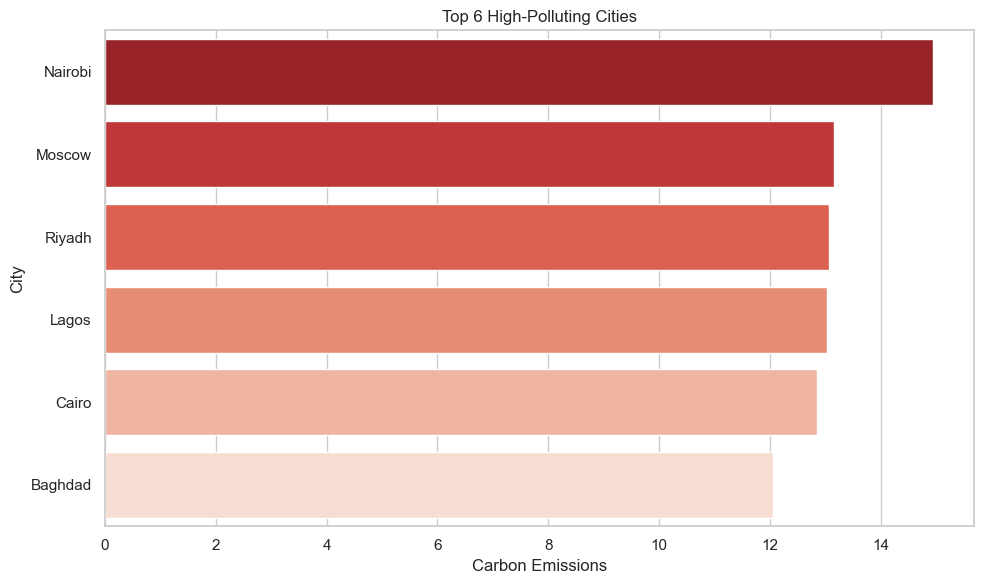

In [9]:
# Top 10 cities with highest carbon emissions
top_polluting = df.sort_values(by='carbon_emissions', ascending=False).head(6)
print(top_polluting[['city', 'carbon_emissions']])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='carbon_emissions', y='city', data=top_polluting, palette='Reds_r')
plt.title('Top 6 High-Polluting Cities')
plt.xlabel('Carbon Emissions')
plt.ylabel('City')
plt.tight_layout()
plt.show()


C:\Users\epist\AppData\Local\Temp\ipykernel_28940\3315631863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='green_space_pct', y='city', data=low_green, palette='Greens_r')


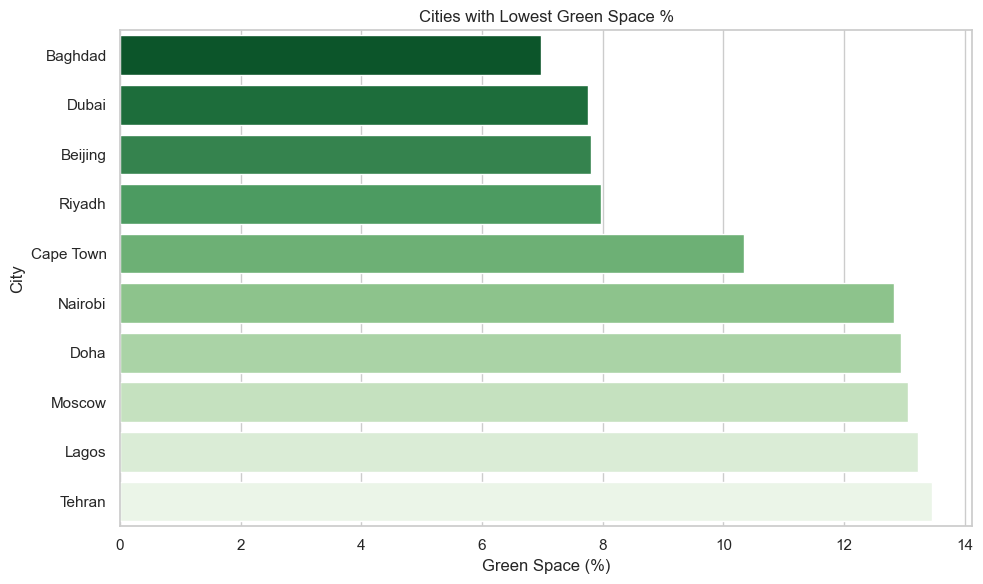

In [10]:
low_green = df.sort_values(by='green_space_pct').head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='green_space_pct', y='city', data=low_green, palette='Greens_r')
plt.title('Cities with Lowest Green Space %')
plt.xlabel('Green Space (%)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

C:\Users\epist\AppData\Local\Temp\ipykernel_28940\2458431205.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='waste_recycled_pct', y='city', data=low_recycling, palette='Blues_r')


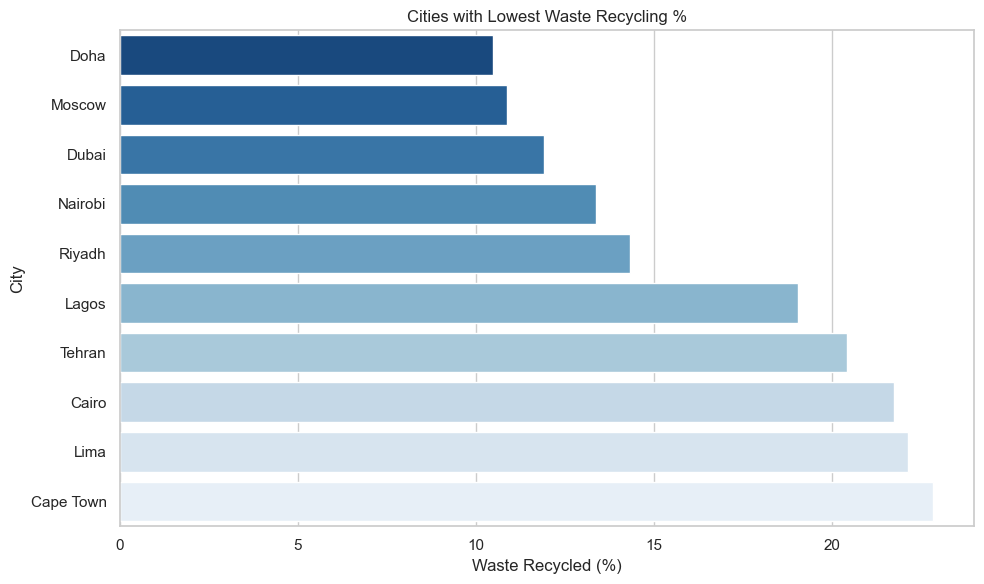

In [11]:
low_recycling = df.sort_values(by='waste_recycled_pct').head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='waste_recycled_pct', y='city', data=low_recycling, palette='Blues_r')
plt.title('Cities with Lowest Waste Recycling %')
plt.xlabel('Waste Recycled (%)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

C:\Users\epist\AppData\Local\Temp\ipykernel_28940\1813420459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='energy_efficiency_score', y='city', data=low_energy, palette='Purples_r')


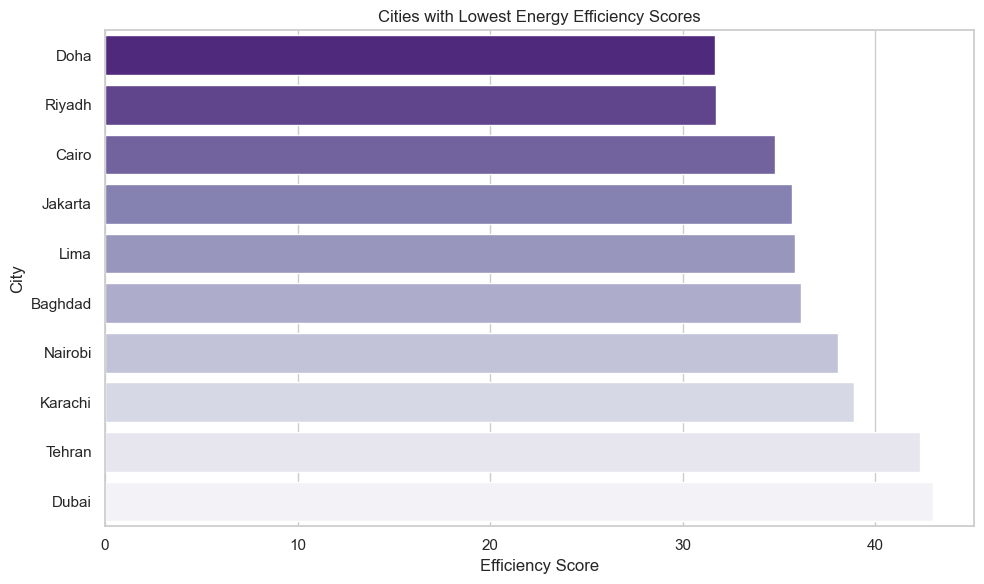

In [12]:
low_energy = df.sort_values(by='energy_efficiency_score').head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='energy_efficiency_score', y='city', data=low_energy, palette='Purples_r')
plt.title('Cities with Lowest Energy Efficiency Scores')
plt.xlabel('Efficiency Score')
plt.ylabel('City')
plt.tight_layout()
plt.show()

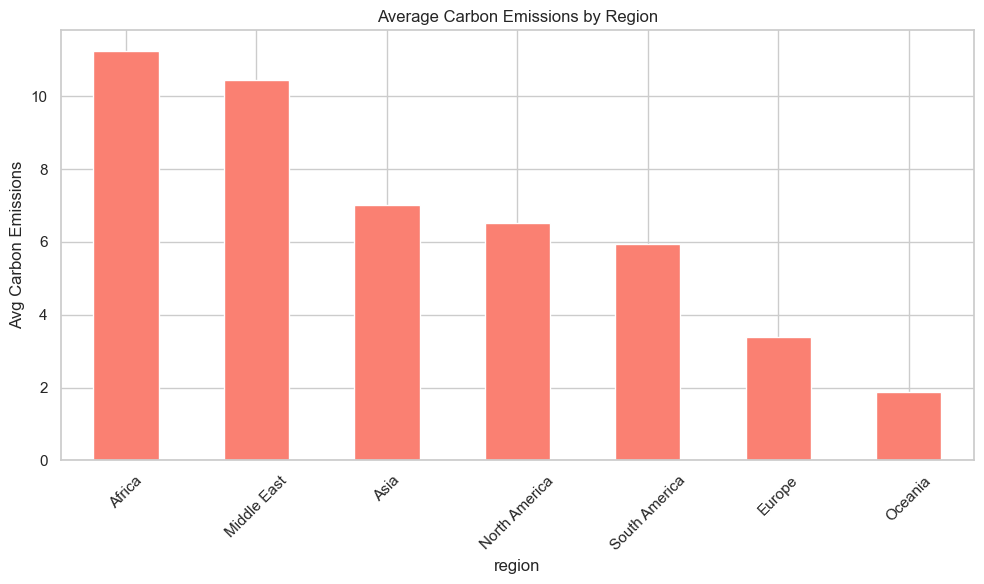

In [13]:
region_emissions = df.groupby('region')['carbon_emissions'].mean().sort_values(ascending=False)
region_emissions.plot(kind='bar', figsize=(10,6), color='salmon')
plt.title('Average Carbon Emissions by Region')
plt.ylabel('Avg Carbon Emissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

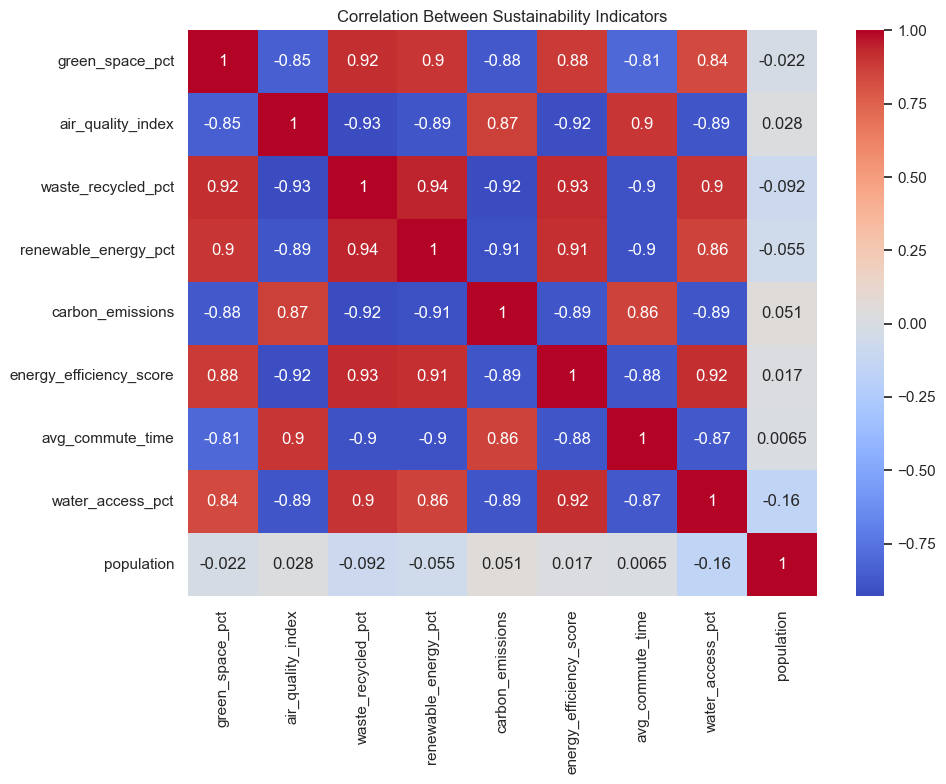

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Sustainability Indicators')
plt.tight_layout()
plt.show()

In [15]:
df_clustering = df.drop(columns=["city", "country", "iso_alpha", "region"])

In [16]:
df_clustering.head()

,green_space_pct,air_quality_index,waste_recycled_pct,renewable_energy_pct,carbon_emissions,energy_efficiency_score,avg_commute_time,water_access_pct,population
0,34.130312,27.803701,73.260731,57.587172,1.585469,83.770061,35.434601,98.654147,12820569
1,30.691328,29.976149,69.926681,62.110763,3.966732,85.323118,31.853070,95.780819,8376519
2,34.371654,41.449656,73.463327,57.134641,1.807427,80.960685,35.644900,96.172806,2276647
3,30.973934,20.225760,80.081712,60.670239,2.077827,82.198456,27.514830,99.816734,13431216
4,34.050208,34.710316,64.372697,65.635807,1.629242,85.289516,27.654293,96.276533,17040922


In [17]:
len(df_clustering.columns)

9

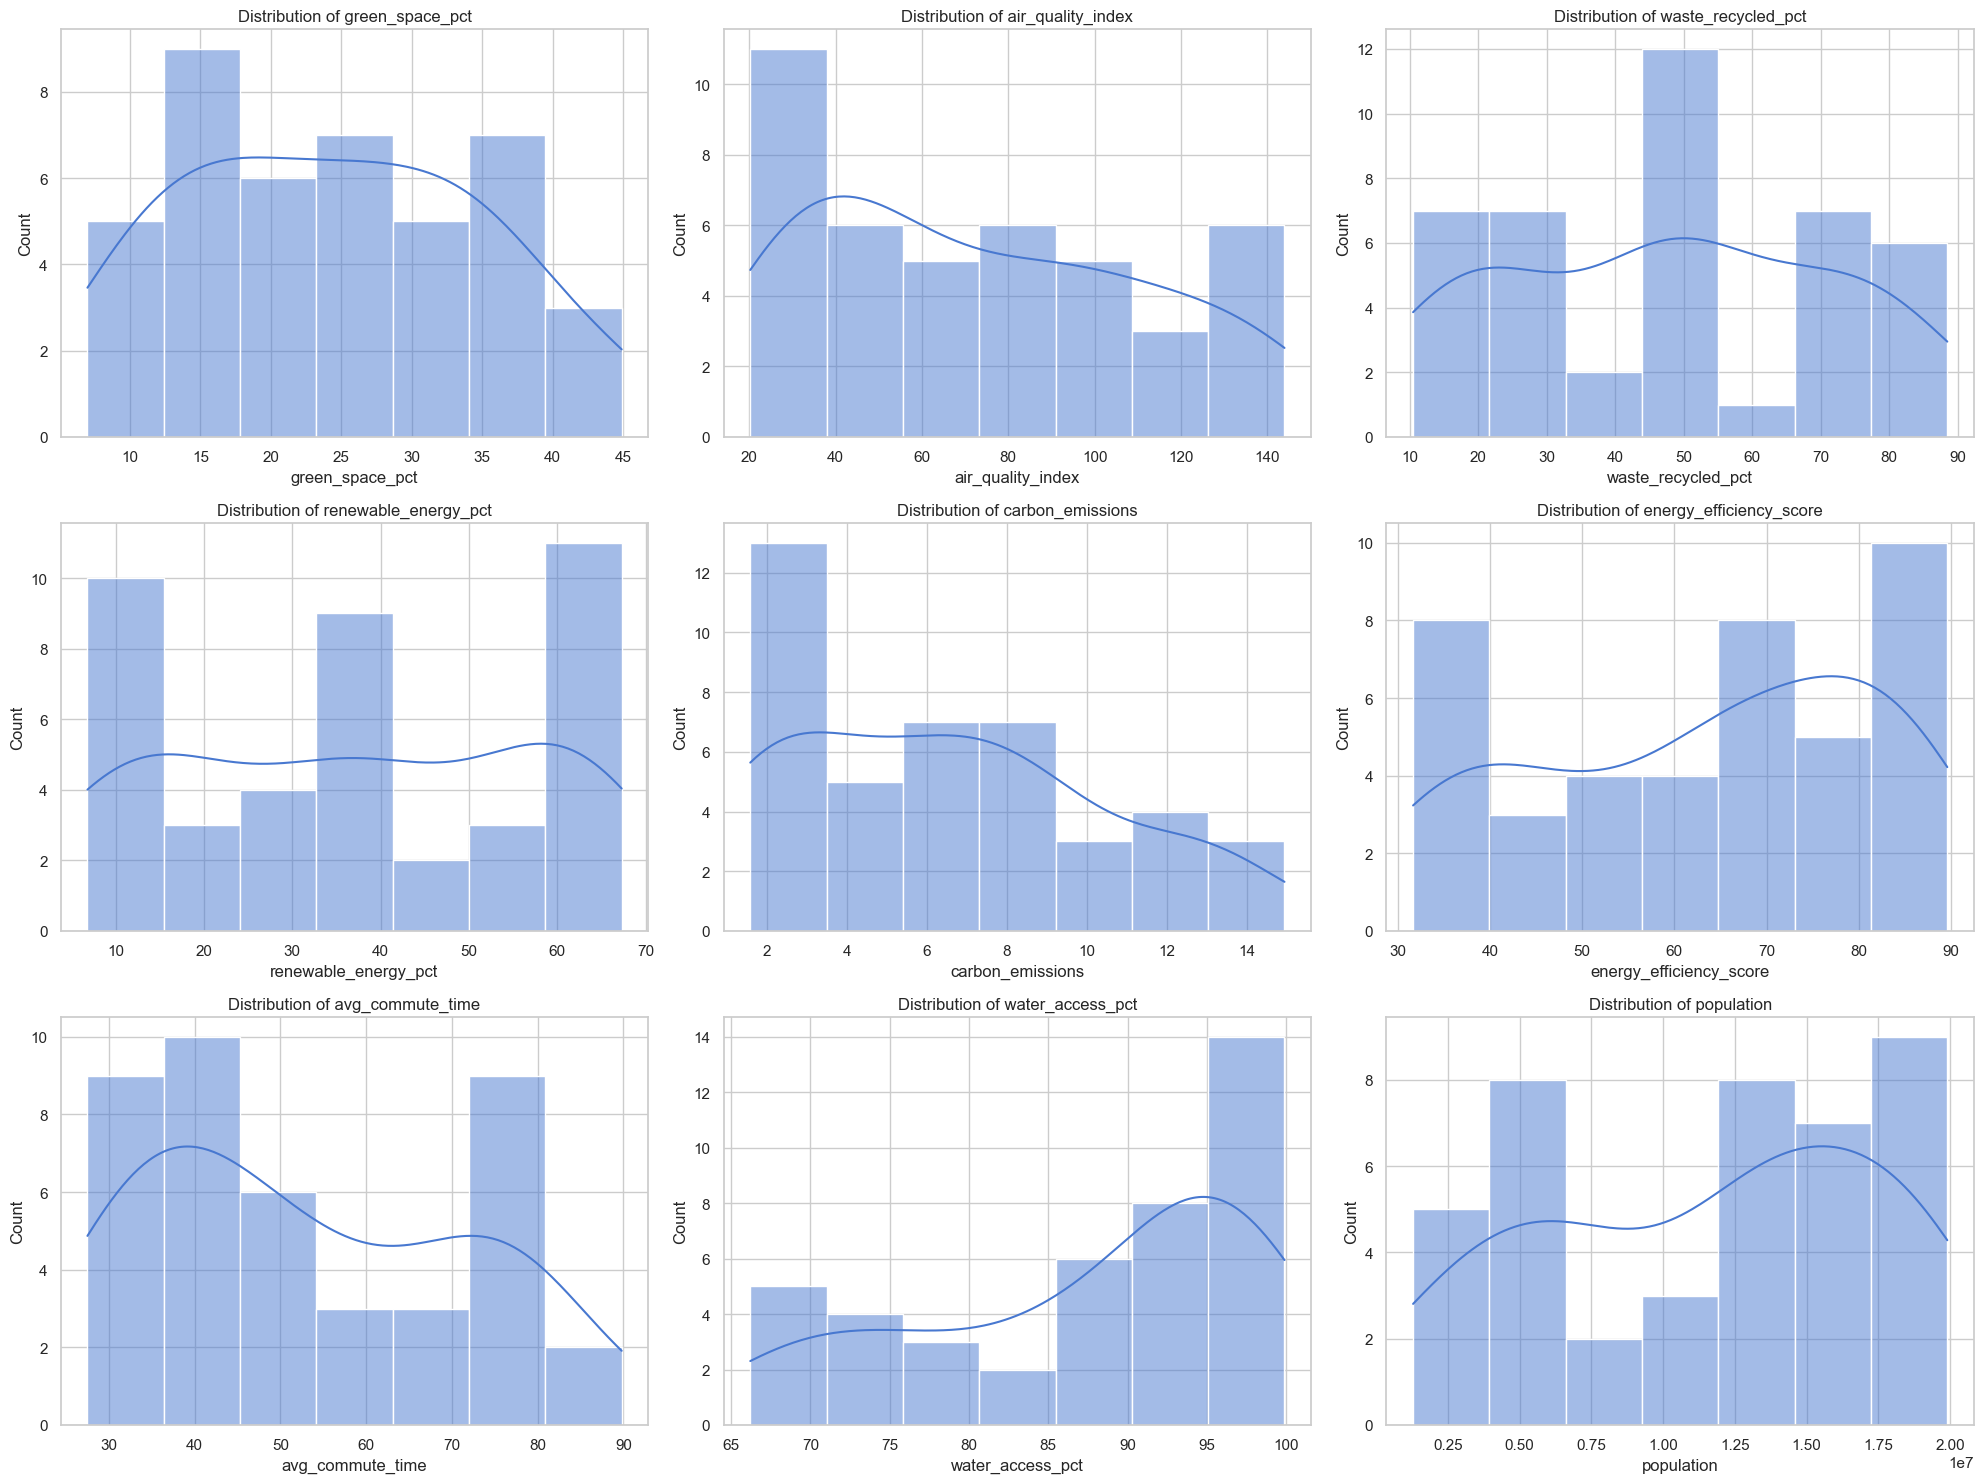

In [18]:
plt.figure(figsize=(20, 15))

for i, column_name in enumerate(df_clustering, 1):
    plt.subplot(3, 3, i)
    # plt.subplots(nrows=3, ncols=3, index=i)
    sns.histplot(df_clustering[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")

plt.tight_layout()
plt.show()

# UNIFORM DISTRIBUTION : MIN MAX SCLARER
# NORMAL DISTRIBUTION : STANDARD SCALER
# SLITELY SKEWED :STANDARD SCALER
# HEAVILY SKEWED : ROBUST SCALER 

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_clustering)


# MODELING

C:\Users\epist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\epist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\epist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\epist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

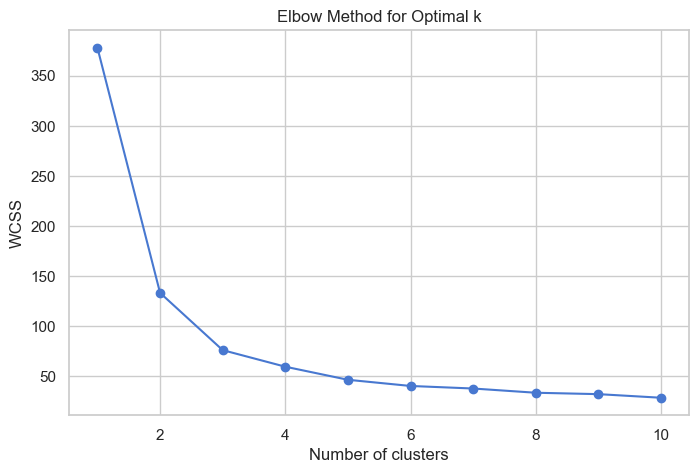

In [20]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [21]:
# train the model

kmeans = KMeans(n_clusters=3, random_state=42)

In [22]:
df['cluster'] = kmeans.fit_predict(scaled_df)

C:\Users\epist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# MODEL INTERPRETATION
- High emissions and low recycling → likely needs intervention.
- Strong green infrastructure → sustainability leaders.

<Axes: xlabel='cluster', ylabel='green_space_pct'>

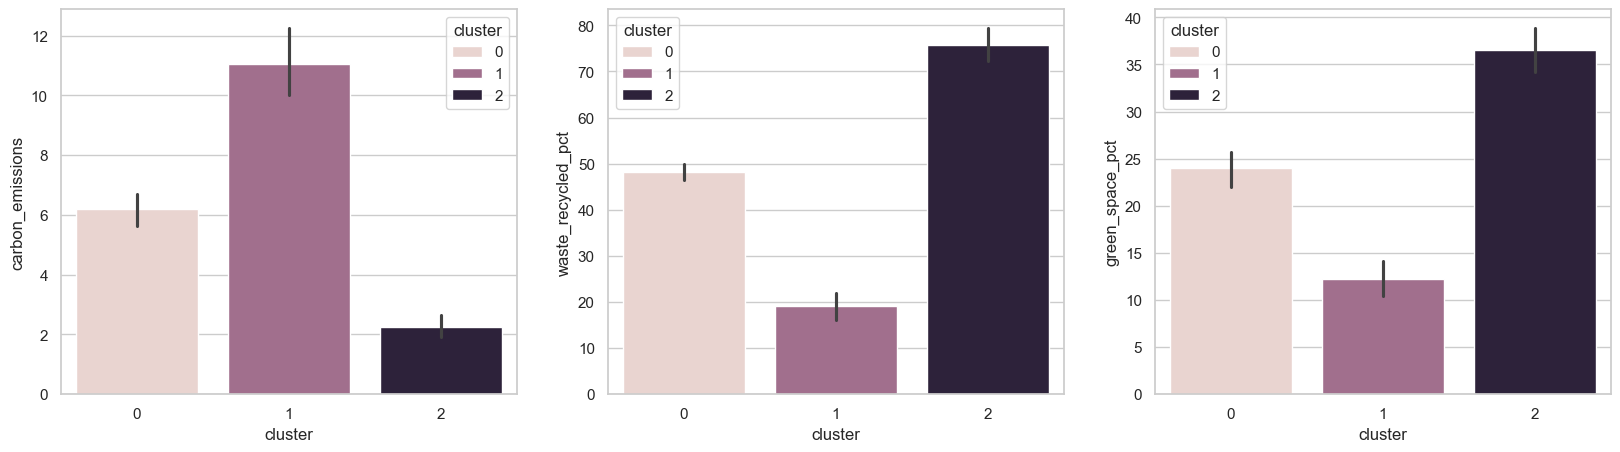

In [23]:
fig, ax = plt.subplots(1,3, figsize=(20, 5))
sns.barplot(x='cluster', y='carbon_emissions', hue='cluster', data=df, ax=ax[0])
sns.barplot(x='cluster', y='waste_recycled_pct', hue='cluster', data=df, ax=ax[1])
sns.barplot(x='cluster', y='green_space_pct', hue='cluster', data=df, ax=ax[2])
# sns.barplot(x='cluster', y='waste_recycled_pct', data=df, ax=ax[1])

### 🧠 Interpretation

- **Cluster 0**: Moderate performance, mixed attributes
- **Cluster 1**: Critical cities with high emissions, low green energy, and poor recycling rates
- **Cluster 2**: High-performing cities with strong green metrics and low emissions

These insights will guide GreenCityWatch in targeting aid and green policy interventions.


In [24]:
# Map/rename numeric "new" clusters to meaningful sustainability labels
df["cluster_label"] = df["cluster"].map({
                                        0: "Transitional Cities",
                                        1: "Critical Intervention Zone",
                                        2: "Sustainability Leaders"
                                    })

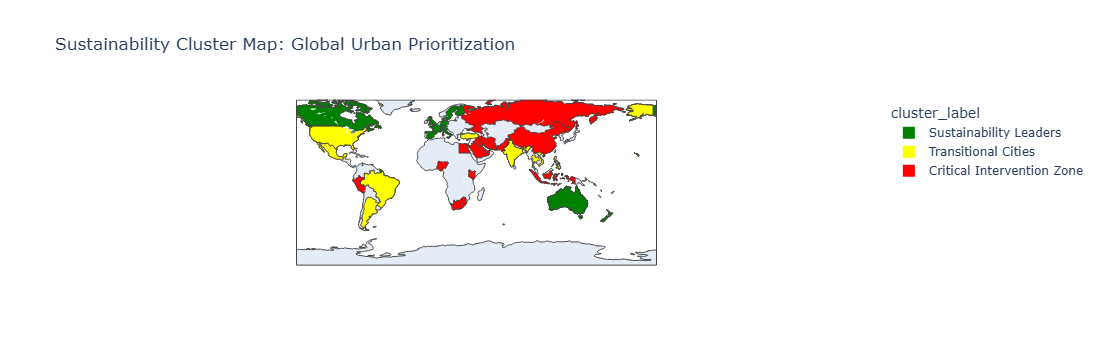

In [31]:
import plotly.express as px

fig = px.choropleth(
    df,
    locationmode = 'country names',
    locations="country",
    color="cluster_label",
    hover_name="country",
    title="Sustainability Cluster Map: Global Urban Prioritization",
    color_discrete_map={
                        "Critical Intervention Zone":"red",
                        "Transitional Cities":"yellow",
                        "Sustainability Leaders":"green"
                       }
)

fig.show()


In [27]:
scaled_df.shape

(42, 9)

## Inference
#### We will be using joblib to save our data, to use joblib, we have to import it, then paste/dump trained data into it and name it.
#### Trained data is kmeans, the name given to the trained data is kmeans-sustainability-model


In [35]:
import joblib

In [36]:
#save the trained data-aka model
joblib.dump(kmeans, "kmeans_sustainability_model.joblib")

['kmeans_sustainability_model.joblib']

In [37]:
#save the trained scaler
joblib.dump(scaler, "scaler_sustainability.joblib")

['scaler_sustainability.joblib']

## Extra visualizations

#### carbon_emissions vs. renewable_energy_pct
→ Show the trade-off between pollution and green energy use.


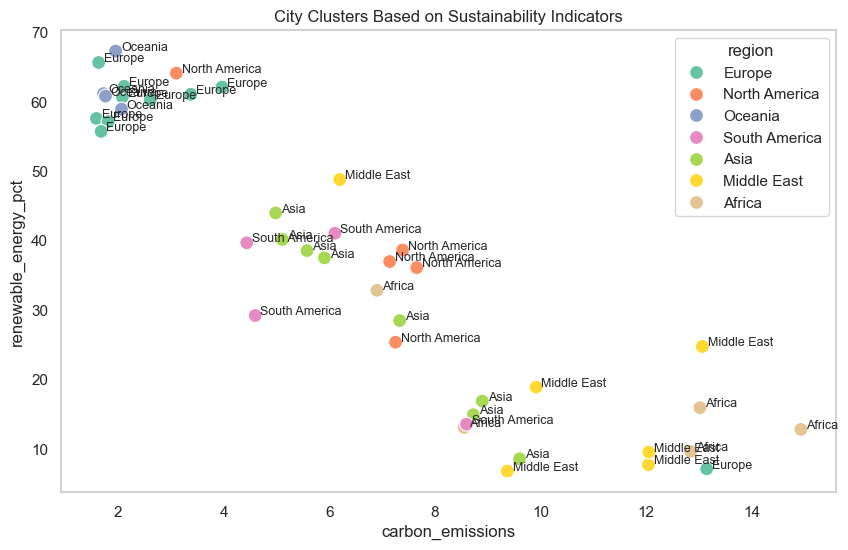

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carbon_emissions', y='renewable_energy_pct', hue='region', palette='Set2', s=100)
for i in range(df.shape[0]):
    plt.text(df.carbon_emissions[i]+0.1, df.renewable_energy_pct[i]+0.1, df.region[i], fontsize=9)
plt.title("City Clusters Based on Sustainability Indicators")
plt.grid(False)
plt.show()


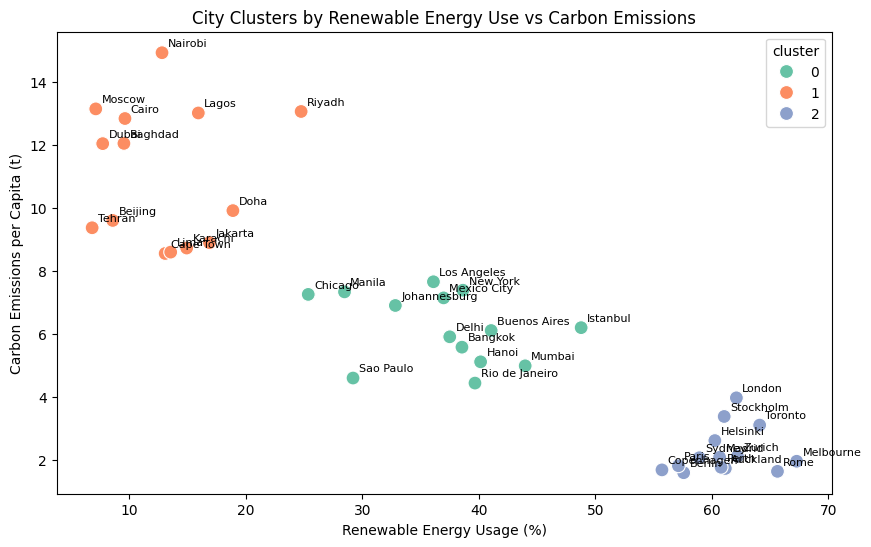

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='renewable_energy_pct', 
    y='carbon_emissions', 
    hue='cluster', 
    palette='Set2', 
    s=100
)

# Annotate city names
for i in range(df.shape[0]):
    plt.text(df['renewable_energy_pct'][i] + 0.5, df['carbon_emissions'][i] + 0.2, df['city'][i], fontsize=8)

plt.title("City Clusters by Renewable Energy Use vs Carbon Emissions")
plt.xlabel("Renewable Energy Usage (%)")
plt.ylabel("Carbon Emissions per Capita (t)")
plt.grid(False)
plt.show()
